# Predicting Crop Yields using a Machine Learning Model

### File Info
> **Author:** Leah Nicholson<br/>
**Date:** June 22nd, 2025<br/>
**Dataset:** Crop Yield Prediction Dataset<br/>
**Algorithm:**  Decision Tree<br/>
**ML Libraries:** Pandas, Numpy, Seaborn, Matplotlib, Scikit-learn <br/>

### Project Description 

> **Context:**<br/>
Machine learning in agriculture is increasingly valuable, particularly in predicting crop yields. As a fundamental part of the global economy, agriculture sustains the human population, making accurate yield forecasting essential for addressing food security concerns and combating unpredictable weather. Crop yield prediction plays a crucial role in agricultural planning, which is what this machine learning model is trained to assist with. Key factors such as weather conditions (rainfall, temperature, etc.), pesticide usage, and historical yield data provides us with the necessary insights for training this model, allowing stakeholders to manage agricultural risks and make informed decisions to optimize future harvests. <br/>

> **Task:**<br/>
Develop a machine learning model to predict crop yields using historical data. Since this data is nonlinear, a model suited for nonlinearity will be used: Decision Tree. <br/>

### Data Notes

> **Data Source**: <br/>This dataset is from the FAO (Food and Agriculture Organization) and World Data Bank, sourced through the Crop Yield Prediction Dataset through Kaggle. <br/>

> **Link to Dataset:** <br/>[Crop Yield Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?resource=download)<br/>

> **Dataset Shape:** <br/>
The dataset contains 28241 Rows (crop-years) x 7 columns (features) = 197,687 data points<br/>
This excludes the provided indexing column. <br/>

> **Column Descriptions:** <br/>
    Unnamed: 0 | Contains an indexing number for the data <br/>
    Area | Contains the Country name<br/>
    Item | Contains the crop type (eg: Maize)<br/>
    Year | The given year<br/>
    hg/ha_yield | The yield obtained (our target variable)<br/>
    average_rain_fall_mm_per_year | Average rainfall in millimeters per year experienced in the given Area (Country)<br/>
    pesticides_tonnes | Pesticide use in tons<br/>
    avg_temp | The yearly average temperature experienced in the Area (Country)<br/>



## Imports

In [4]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import tree

In [5]:
# Import data and load into pandas dataframe
yield_df = pd.read_csv("yield_df.csv")

# Data Exploration Phase

### Getting a sense of the data:

In [8]:
# First rows
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
# Last rows
yield_df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [10]:
# View shape of dataframe
yield_df.shape

(28242, 8)

In [11]:
# View max and min Yield values - the target variable
print('Min Yield: ', yield_df['hg/ha_yield'].min())
print('Max Yield: ', yield_df['hg/ha_yield'].max())

# View year range
print('Min Year: ', yield_df['Year'].min())
print('Max Year: ', yield_df['Year'].max())

Min Yield:  50
Max Yield:  501412
Min Year:  1990
Max Year:  2013


In [12]:
# View Dtypes and determine if there are easily spotted missing values
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [13]:
# View column names

col_list = []

for columns in yield_df:
    col_list.append(columns)

for item in col_list:
    print(item)

Unnamed: 0
Area
Item
Year
hg/ha_yield
average_rain_fall_mm_per_year
pesticides_tonnes
avg_temp


In [14]:
# Describe the data
yield_df.describe().round(2)

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00
mean,14120.50,2001.54,77053.33,1149.06,37076.91,20.54
std,8152.91,7.05,84956.61,709.81,59958.78,6.31
min,0.00,1990.00,50.00,51.00,0.04,1.30
25%,7060.25,1995.00,19919.25,593.00,1702.00,16.70
50%,14120.50,2001.00,38295.00,1083.00,17529.44,21.51
75%,21180.75,2008.00,104676.75,1668.00,48687.88,26.00
max,28241.00,2013.00,501412.00,3240.00,367778.00,30.65


### Preliminary Data Visualizations: Histograms

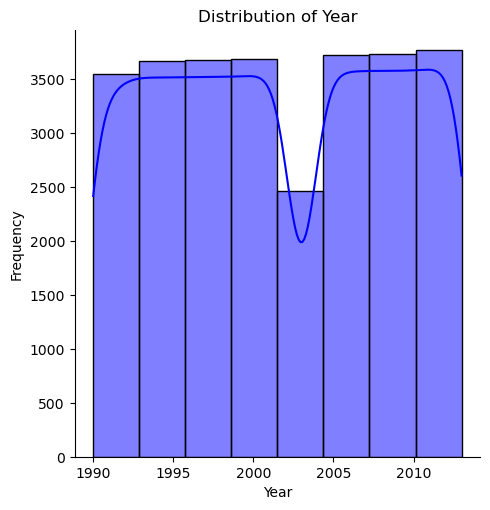

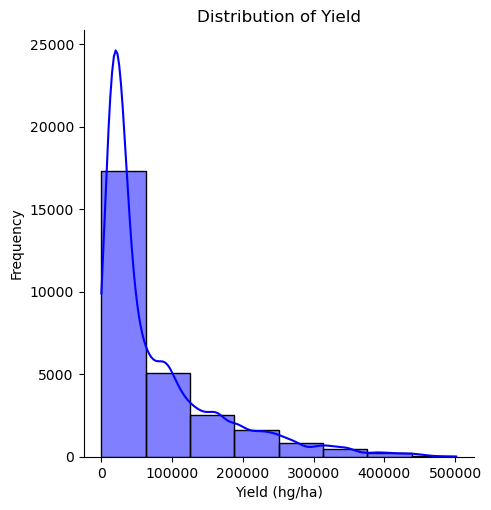

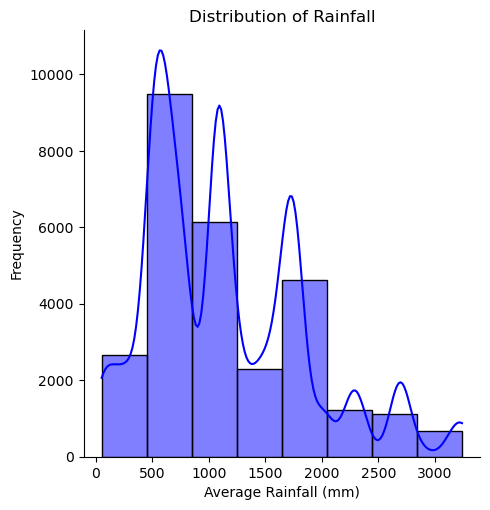

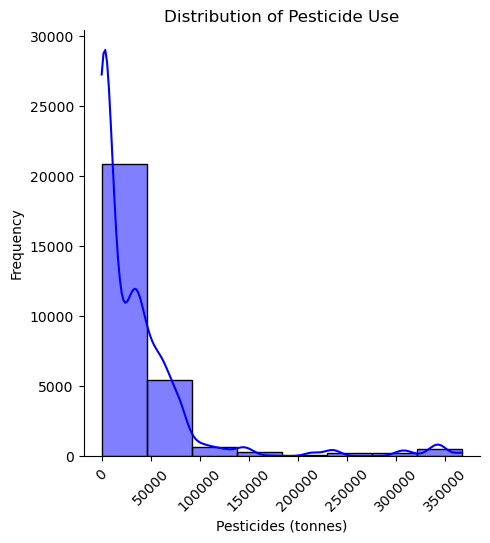

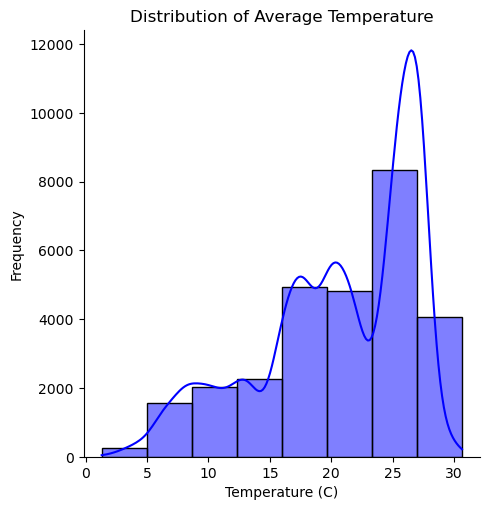

In [16]:
# Histograms for each Feature to view distributions

# Year
sns.displot(data = yield_df, kind = 'hist', x = "Year", bins = 8, kde = True, color = 'blue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Yield
sns.displot(data = yield_df, kind = 'hist', x = "hg/ha_yield", bins = 8, kde = True, color = 'blue')
plt.title('Distribution of Yield')
plt.xlabel('Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()

# Rain column 
sns.displot(data = yield_df, kind = 'hist', x = "average_rain_fall_mm_per_year", bins = 8, kde = True, color = 'blue')
plt.title('Distribution of Rainfall')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# Pesticides column 
sns.displot(data = yield_df, kind = 'hist', x = "pesticides_tonnes", bins = 8, kde = True, color = 'blue')
plt.xticks(rotation = 45)
plt.title('Distribution of Pesticide Use')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Frequency')
plt.show()

# Pesticides column 
sns.displot(data = yield_df, kind = 'hist', x = "avg_temp", bins = 8, kde = True, color = 'blue')
plt.title('Distribution of Average Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

### Preliminary Data Visualizations: Boxplots

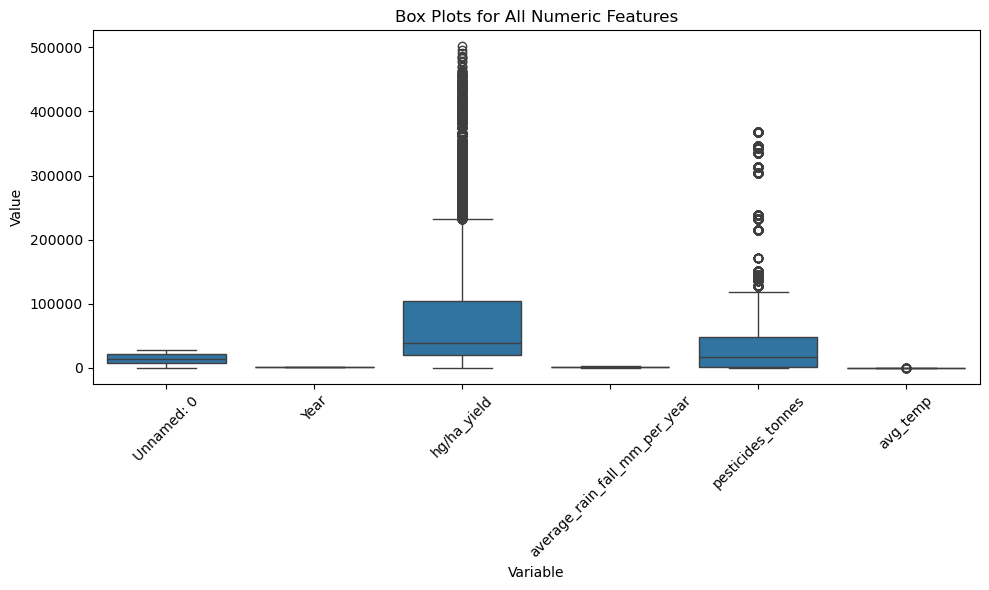

In [18]:
# Boxplots

# Converted column names to strings:
yield_df.columns = yield_df.columns.astype(str)

# Only include numeric columns (boxplot can't handle strings):
numeric_cols = yield_df.select_dtypes(include = 'number')

# Melt the numeric DataFrame 
df_melted = numeric_cols.melt(var_name = 'Variable', value_name = 'Value')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Variable', y = 'Value', data = df_melted)
plt.xticks(rotation = 45)
plt.title('Box Plots for All Numeric Features')
plt.tight_layout()
plt.show()

### Preliminary Data Visualizations: Scatterplots

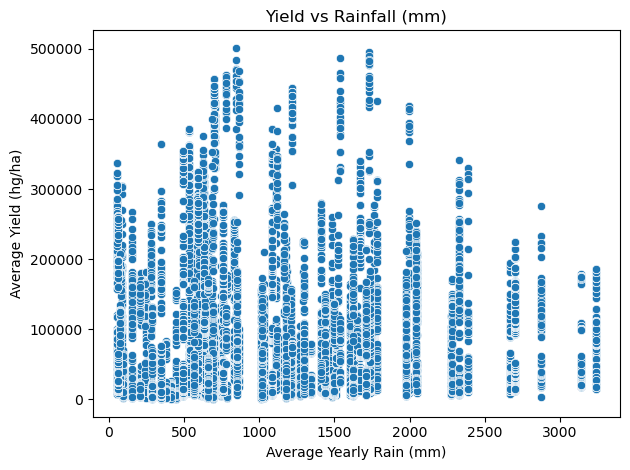

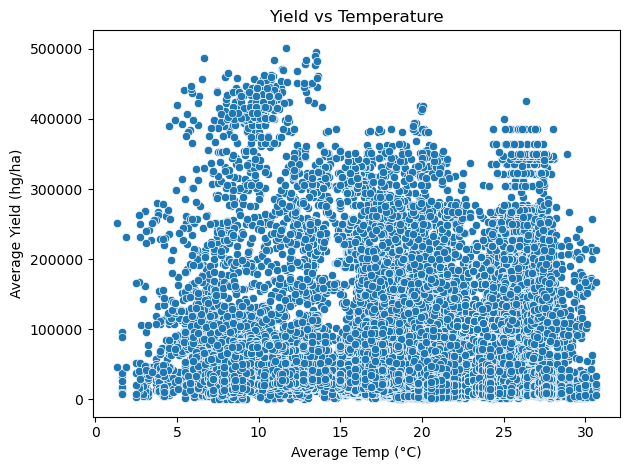

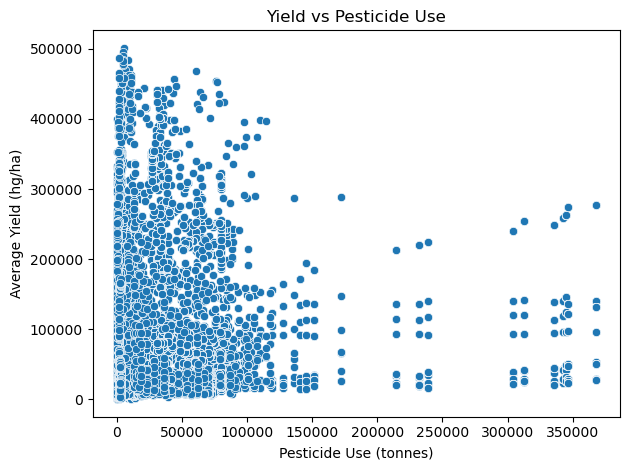

In [20]:
# Scatterplots - using seaborn and matplotlib
# Analyzing the yield (target variable) compared to different features

# Scatter: yield vs rainfall
sns.scatterplot(data=yield_df, x='average_rain_fall_mm_per_year', y='hg/ha_yield')   # hue='Item'
plt.xlabel('Average Yearly Rain (mm)')
plt.ylabel('Average Yield (hg/ha)')
plt.title('Yield vs Rainfall (mm)')
plt.tight_layout()
plt.show()

# Scatter: yield vs temperature
sns.scatterplot(data=yield_df, x='avg_temp', y='hg/ha_yield')
plt.xlabel('Average Temp (°C)')
plt.ylabel('Average Yield (hg/ha)')
plt.title('Yield vs Temperature')
plt.tight_layout()
plt.show()

# Scatter: yield vs pesticides
sns.scatterplot(data=yield_df, x='pesticides_tonnes', y='hg/ha_yield')
plt.xlabel('Pesticide Use (tonnes)')
plt.ylabel('Average Yield (hg/ha)')
plt.title('Yield vs Pesticide Use')
plt.tight_layout()
plt.show()

### Preliminary Data Visualizations: Heatmap

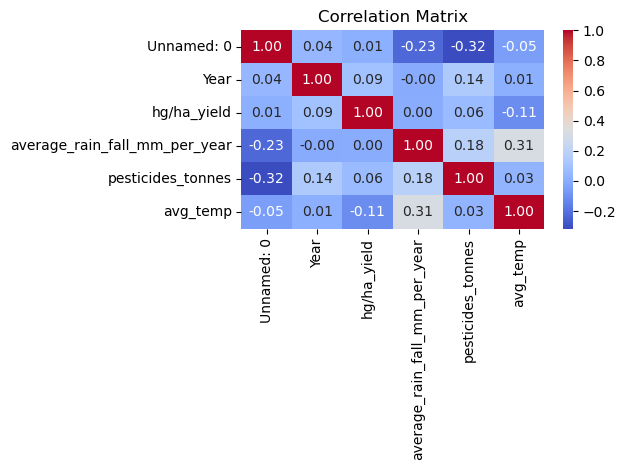

In [22]:
# Correlation Matrix (Heatmap)
# Reveals how strongly pairs of variables in the dataset are linearly related to one another.
# Like a reference sheet, helps us find patterns, redundancies, or potential features that could impact the model.

corr = yield_df.select_dtypes(include = 'number').corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


# Data Preprocessing

### Drop uneccessary columns:

In [25]:
# Cleaning up data - dropping unecessary indexing column, and checking resulting dataframe:

yield_df = yield_df.drop(columns = 'Unnamed: 0')
yield_df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Check for null values:

In [27]:
# check for null values - none appear present
yield_df.isnull().sum()


Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

### Check for duplicates:

In [29]:
# Detect duplicates

if yield_df.duplicated().any():
    print("Duplicates found")
else:
    print("No duplicates found")


Duplicates found


In [30]:
# Count duplicates
yield_df.duplicated().value_counts()


False    25932
True      2310
Name: count, dtype: int64

In [31]:
# Look at the duplicates
duplicates = yield_df[yield_df.duplicated()]
duplicates

# Analysis:
# These duplicates aren’t exact duplicates in that they differ by crop, 
# even though other features (like country, year, rainfall, pesticide use, and temperature) are the same. 
# I am working with unique Crop-Years, not just Years.
# This means they are all distinct observations and should NOT be removed as duplicates.

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2083,Bangladesh,Maize,1990,10015,2666.0,1266.00,25.98
2085,Bangladesh,Potatoes,1990,91410,2666.0,1266.00,25.98
2087,Bangladesh,"Rice, paddy",1990,25661,2666.0,1266.00,25.98
2089,Bangladesh,Sorghum,1990,8103,2666.0,1266.00,25.98
2091,Bangladesh,Sweet potatoes,1990,98316,2666.0,1266.00,25.98
...,...,...,...,...,...,...,...
27690,United Kingdom,Wheat,2011,77471,1220.0,16401.66,10.63
27695,United Kingdom,Potatoes,2012,305570,1220.0,17718.64,9.55
27700,United Kingdom,Wheat,2012,66571,1220.0,17718.64,9.55
27705,United Kingdom,Potatoes,2013,408993,1220.0,17673.46,9.57


### Rename and rearrange columns for clarity:

In [33]:
# Renaming for greater ease and clarity

yield_df = yield_df.rename(columns = {
    'Area': 'country', 
    'Item': 'crop', 
    'Year':'year', 
    'hg/ha_yield':'yield', 
    'average_rain_fall_mm_per_year':'yearly_avg_rain', 
    'pesticides_tonnes':'pesticides_ton'
    })

yield_df.head()


,country,crop,year,yield,yearly_avg_rain,pesticides_ton,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [34]:
# Rearrange the columns so target is at the end:

cols = [col for col in yield_df.columns if col != 'yield'] + ['yield']
yield_df = yield_df[cols]

yield_df  # Verify result - checks out


,country,crop,year,yearly_avg_rain,pesticides_ton,avg_temp,yield
0,Albania,Maize,1990,1485.0,121.00,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.00,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.00,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657.0,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76,22222


### Determine how to group the data:

In [36]:
# Determine if I want to group the data

# Count unique values
print('Counts of Unique Values:')
print('Unique country count: ', yield_df['country'].nunique())
print('Unique crop count: ', yield_df['crop'].nunique())

# Display actual unique values
print()
print('The Actual Unique Values:')                              # All are truly unique countries
print("Countries:", yield_df['country'].unique())               # Each crop is truly unique
print()
print("Crops:", yield_df['crop'].unique())

# Display the unique value frequencies
print()
print('The Frequency of the Values:')
print(yield_df['country'].value_counts())
print()
print(yield_df['crop'].value_counts())

Counts of Unique Values:
Unique country count:  101
Unique crop count:  10

The Actual Unique Values:
Countries: ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia

### Define cutoff point:

In [38]:
# # Find a cutoff for the top N countries:  using cumulative frequency as a threshold
# country_counts = yield_df['country'].value_counts()
# cumulative_percent = country_counts.cumsum() / country_counts.sum() * 100
# cutoff = cumulative_percent[cumulative_percent <= 95]                          # establishes the top countries contributing to 95% of the data
# top_countries = cutoff.index.tolist()

# # Next step: Replace non-top countries with 'Other'
# yield_df['country_grouped'] = yield_df['country'].apply(lambda x: x if x in top_countries else 'Other')
# yield_df.drop(columns = 'country', inplace = True)


### Label encoding:

In [40]:
le_country = LabelEncoder()
le_crop = LabelEncoder()

yield_df['country'] = le_country.fit_transform(yield_df['country'])
yield_df['crop'] = le_crop.fit_transform(yield_df['crop'])

# yield_df['country_grouped'] = le.fit_transform(yield_df['country_grouped'])


In [41]:
# Check: confirmed - country and crop columns now show numerical values
yield_df

,country,crop,year,yearly_avg_rain,pesticides_ton,avg_temp,yield
0,0,1,1990,1485.0,121.00,16.37,36613
1,0,3,1990,1485.0,121.00,16.37,66667
2,0,4,1990,1485.0,121.00,16.37,23333
3,0,5,1990,1485.0,121.00,16.37,12500
4,0,6,1990,1485.0,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,100,4,2013,657.0,2550.07,19.76,22581
28238,100,5,2013,657.0,2550.07,19.76,3066
28239,100,6,2013,657.0,2550.07,19.76,13142
28240,100,7,2013,657.0,2550.07,19.76,22222


### Correlation Heatmap

<Axes: >

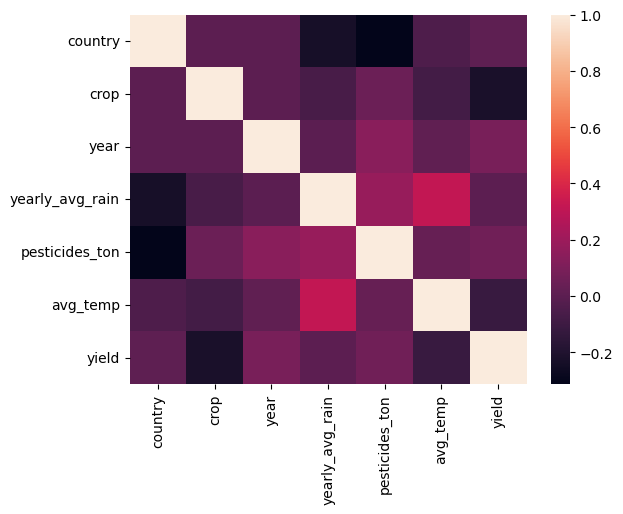

In [43]:
# Generating the correlation matrix to view a quick overview of the dataset's structure and the interplay between numerical variables
# In decision trees, this tells us Feature Importance (highly correlated features with the target variable) are often good candidates for important splits
# Also allows us to remove redundant features (to simplify the model, make it faster to train, easier to interpret, might prevent overfitting)
# The correlation coefficients range from -1 (neg correlation) to +1 (pos correlation), with 0 being no correlation

sns.heatmap(yield_df.corr())

### Viewing some emerging relationships:

Text(0.5, 1.0, 'Temperature vs Rainfall')

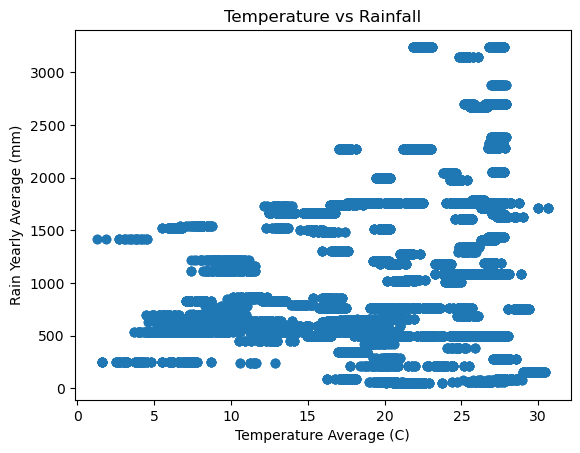

In [45]:
# Relationship between rain and temp
plt.scatter(yield_df['avg_temp'], yield_df['yearly_avg_rain']) 
plt.xlabel('Temperature Average (C)')
plt.ylabel('Rain Yearly Average (mm)')
plt.title('Temperature vs Rainfall')

Text(0.5, 1.0, 'Pesticide Use vs Yield')

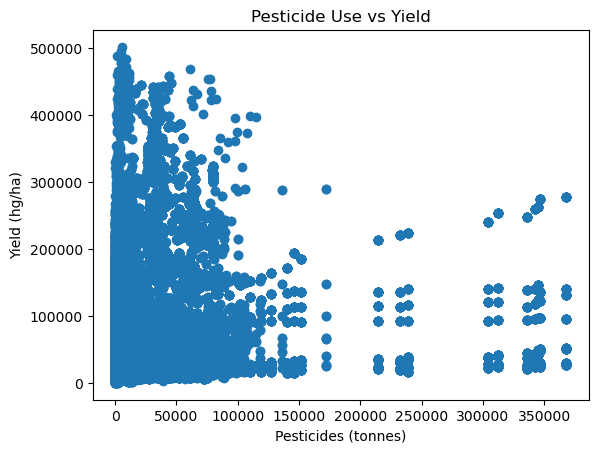

In [46]:
# Relationship between pesticides and yield
plt.scatter(yield_df['pesticides_ton'], yield_df['yield']) 
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.title('Pesticide Use vs Yield')

Text(0.5, 1.0, 'Pesticide Use vs Yearly Rainfall')

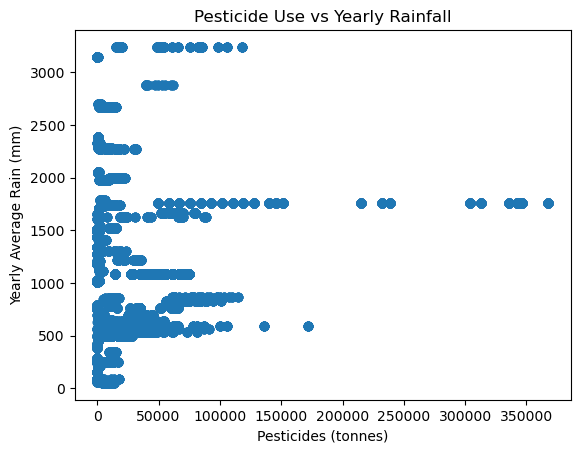

In [47]:
# Relationship between rain and pesticides
plt.scatter(yield_df['pesticides_ton'], yield_df['yearly_avg_rain']) 
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yearly Average Rain (mm)')
plt.title('Pesticide Use vs Yearly Rainfall')

### Train/Test split of the data:

In [49]:
# Split data into independent / dependent variables
X = yield_df.drop(columns = 'yield')      # All but the target variable
y = yield_df['yield']                     # Just the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

### Scaling features:

In [51]:
# Scaling the data:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling the Decision Tree

In [53]:
# Import
from sklearn.tree import DecisionTreeRegressor

# Training the regression model
regressor = DecisionTreeRegressor(criterion = "squared_error", random_state = 100, max_depth = 11, min_samples_leaf = 5)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=11, min_samples_leaf=5, random_state=100)

In [54]:
# Store original feature names
original_feature_names = yield_df.columns[:-1].tolist()
print(f"Original feature names: {original_feature_names}")

Original feature names: ['country', 'crop', 'year', 'yearly_avg_rain', 'pesticides_ton', 'avg_temp']


In [55]:
# Make a Prediction using the ML model
y_pred = regressor.predict(X_test)

In [56]:
# Convert Series to NumPy arrays before reshaping
# Produces:  [ predicted_value, actual_value ]

print(np.concatenate((np.asarray(y_pred).reshape(-1, 1), np.asarray(y_test).reshape(-1, 1)), axis=1))


[[ 27071.41258741  23521.        ]
 [ 70458.          71988.        ]
 [286859.85714286 250797.        ]
 ...
 [  6337.70967742   2156.        ]
 [ 28233.632       26195.        ]
 [293488.66666667 221778.        ]]


# Evaluation of Model

### Hyperparameter Tuning Discussion:

In [59]:
# This performs cross-validation (5-fold, because cv = 5) to test different max_depth values.
# It selects the best model based on average R² score across folds.
# The grid.best_params_ returns the depth with the best performance. The grid.best_estimator_ holds the actual trained best model.

# from sklearn.model_selection import GridSearchCV

# params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, None]}
# grid = GridSearchCV(DecisionTreeRegressor(), param_grid = params, cv = 5)
# grid.fit(X_train, y_train)

# print("Best depth:", grid.best_params_)
# print("Best CV R²:", grid.best_score_)

# best_tree = grid.best_estimator_   # I wanted to use the best found Decision Tree model

# # Predicting using the best model
# y_train_pred = best_tree.predict(X_train)
# y_test_pred = best_tree.predict(X_test)

### R2 Score:

In [61]:
# R² Score (Coefficient of Determination)
# Tells how much variance in the target variable your model explains.
# R² = 1 means perfect predictions, R² = 0 means model predicts the mean of the target, and R² < 0 means model performs worse than just predicting the mean

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9579596617126492


### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

In [63]:
# Mean Squared Error (MSE) measures the average of the squares of the prediction errors 
# (how far off the model’s predictions are from the actual values - larger errors penalized more heavily). 
# Root Mean Squared Error (RMSE) is the square root of MSE - this restores the original units of the target variable so it’s easier to interpret in context.

MSE =  mean_squared_error(y_test, y_pred).round(2)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE): ", (MSE ** 0.5).round(2))                        # RMSE is on the same scale as the target variable - helps us grasp the real-world size of the model’s errors

Mean Squared Error (MSE): 306328098.36
Root Mean Squared Error (RMSE):  17502.23


### Comparing performance on Training and Test Sets:

In [65]:
# Compare performance on training vs test sets:
print("Train R²:", r2_score(y_train, regressor.predict(X_train)))
print("Test R²:", r2_score(y_test, y_pred))

# If Train R² is near 1.0 but Test R² is lower (e.g., < 0.9), overfitting is likely.
# A gap between training and test R² usually grows with depth.

Train R²: 0.9781043561273819
Test R²: 0.9579596617126492


### Visualize Predictions: Training Set

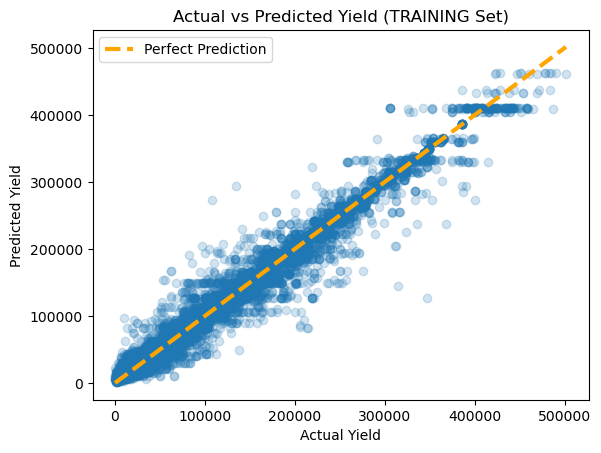

In [67]:
# The orange dashed line is the “ideal” line where prediction = actual value. 
# Points that are near this line indicate good predictions. 
# This works well for any regression model, regardless of the number of features.

# Get predictions on training set
y_train_pred = regressor.predict(X_train)

plt.scatter(y_train, y_train_pred, color='#1f77b4', alpha = 0.2)

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color = 'orange', linewidth = 3, linestyle = '--', label = 'Perfect Prediction')

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (TRAINING Set)')
plt.legend()
plt.show()

### Visualize Predictions: Testing Set

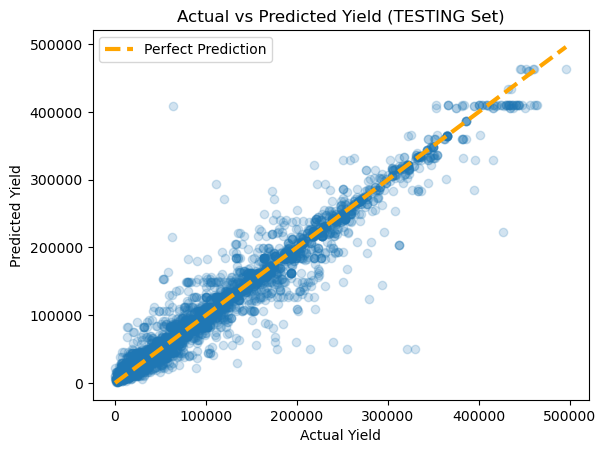

In [69]:
# The orange dashed line is the “ideal” line where prediction = actual value. Points that are near this line indicate good predictions. 
# This tells us if the model generalizes well, ie: does it predict unseen data (the test set) as well as it did the training data?
# It appears to be the case - the graphs look similar.

# Get predictions on test set
y_test_pred = regressor.predict(X_test)

plt.scatter(y_test, y_test_pred, color='#1f77b4', alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linewidth = 3, linestyle = '--', label = 'Perfect Prediction')

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (TESTING Set)')
plt.legend()
plt.show()

### Visualize Predictions:  Using one Feature - Average Temperature

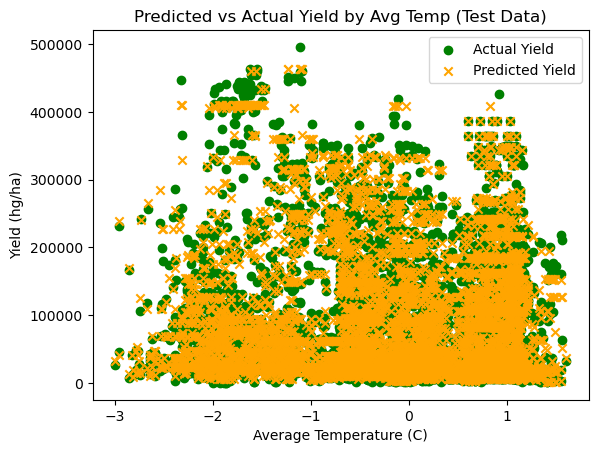

In [71]:
# My dataset has many features, so I choose one feature to focus on, which is 'avg_temp'. I note that is the sixth element in the list (index 5)

plt.scatter(X_test[:, 5], y_test, color = 'green', label = 'Actual Yield')
plt.scatter(X_test[:, 5], y_pred, color = 'orange', marker ='x', label = 'Predicted Yield')

plt.title('Predicted vs Actual Yield by Avg Temp (Test Data)')
plt.xlabel('Average Temperature (C)')
plt.ylabel('Yield (hg/ha)')
plt.legend()
plt.show()

### Visualize Predictions:  Using one Feature - Average Yearly Rain

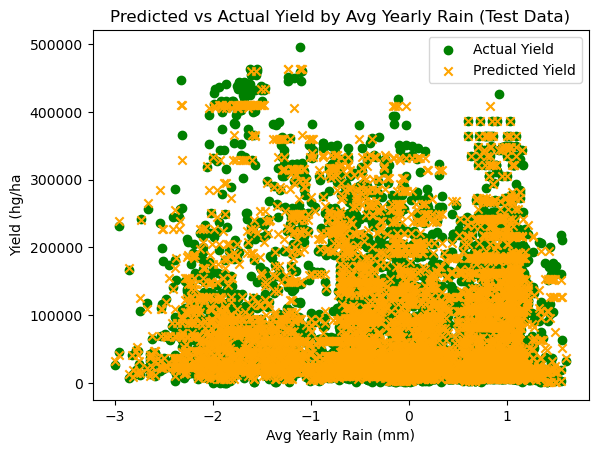

In [73]:
# I choose another feature to focus on, which is 'avg_yearly_rain'. I note that is the fifth element in the list (index 4)

plt.scatter(X_test[:, 5], y_test, color = 'green', label = 'Actual Yield')
plt.scatter(X_test[:, 5], y_pred, color = 'orange', marker = 'x', label = 'Predicted Yield')

plt.title('Predicted vs Actual Yield by Avg Yearly Rain (Test Data)')
plt.xlabel('Avg Yearly Rain (mm)')
plt.ylabel('Yield (hg/ha')
plt.legend()
plt.show()

### Using the model to make a prediction:

In [75]:
# Make predictions

feature_names = ['country', 'crop', 'year', 'yearly_avg_rain', 'pesticides_ton', 'avg_temp']

country_val = le_country.transform(['Azerbaijan'])[0]                  # This converts the categorical variable country into its associated label-encoding value
crop_val = le_crop.transform(['Wheat'])[0]                             # Same as above, but for the crop
new_sample = [country_val, crop_val, 2025, 1480, 121, 16.5]           # Making a list to pass the country and crop, alongside the other column features 

new_sample_df = pd.DataFrame([new_sample], columns = feature_names)    # Turns the sample (my predicted values) into a dataframe
new_sample_scaled = sc.transform(new_sample_df)                        # The scaler standardizes or normalizes the features to the same scale the model expects

prediction = regressor.predict(new_sample_scaled)                      # Pass the prediction to the function
print(prediction.round(2))


[46188.67]


### Visualize the Tree:  Insights to the Decision Making Process

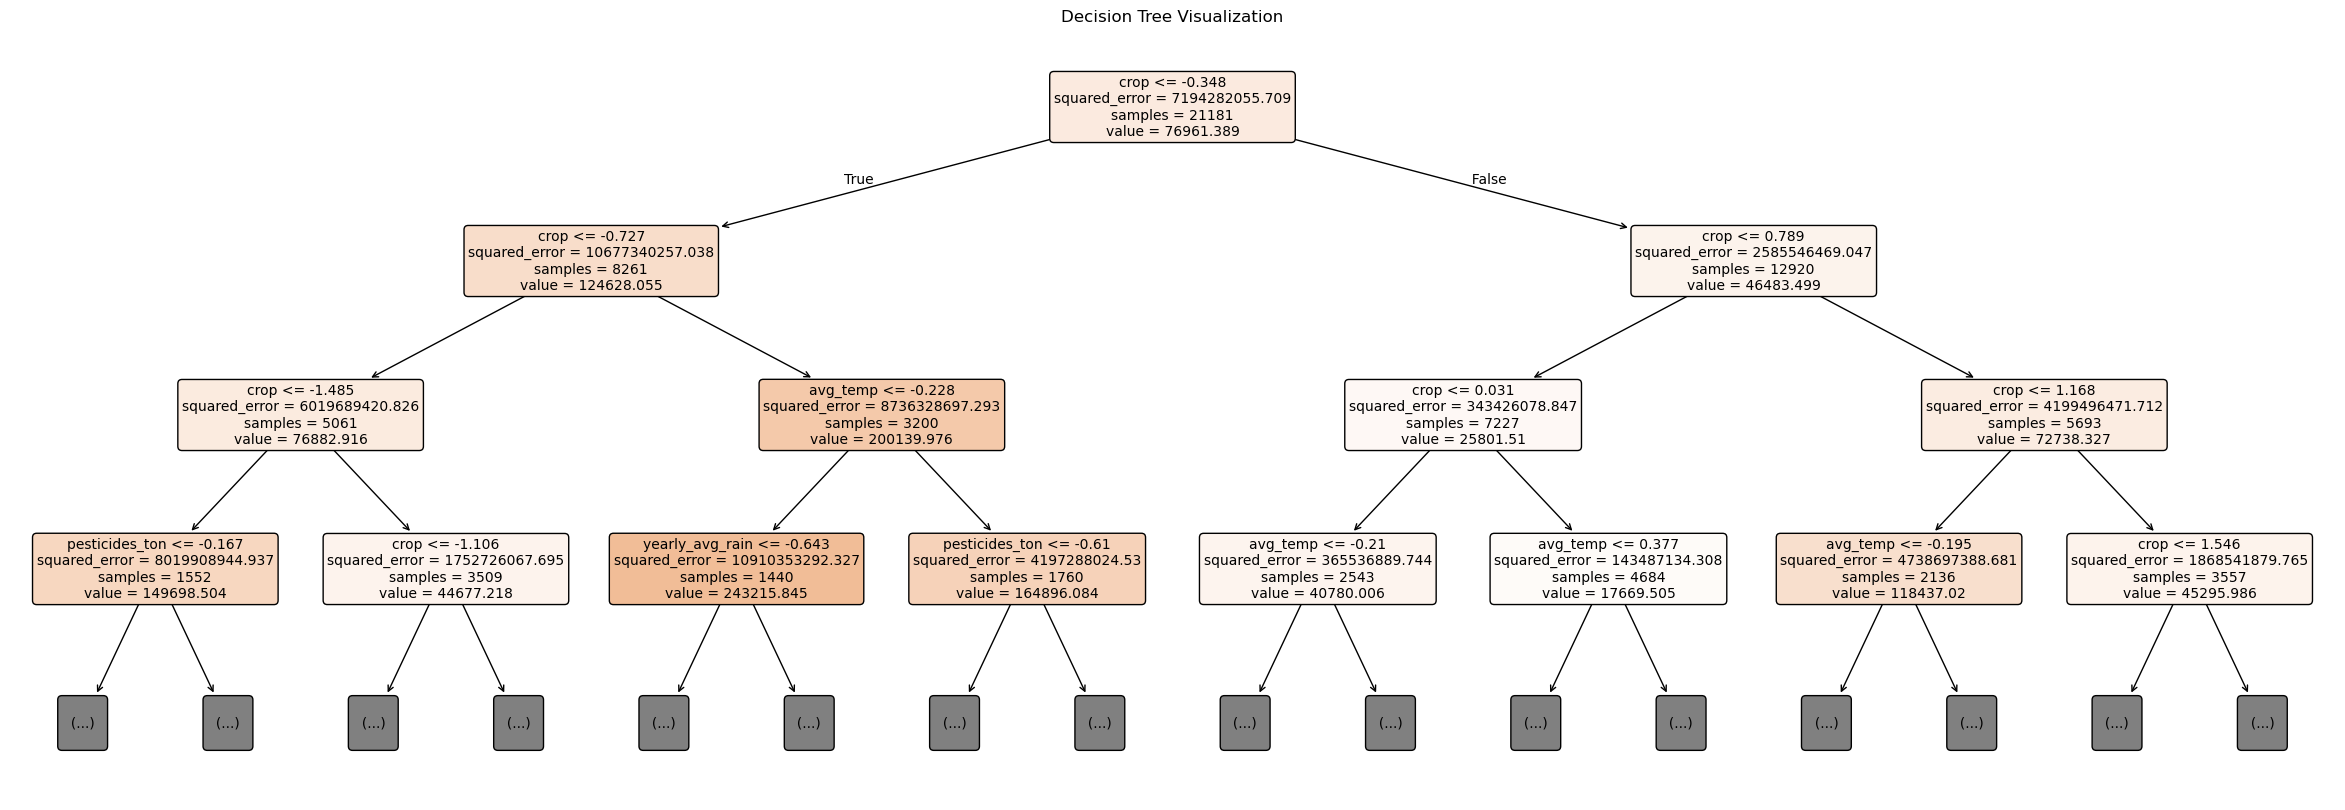

In [77]:
# Visualize Tree

plt.figure(figsize = (30, 10)) 

tree.plot_tree(regressor,
               feature_names = feature_names,
               filled = True,
               rounded = True,
               fontsize = 10,
               max_depth = 3)   # max_depth limits the tree size to top three initial decisions - my dataset is too large to view

plt.title("Decision Tree Visualization")
plt.show()